In [1]:
import numpy as np

import pandas as pd

import os

import warnings

import seaborn as sns
import sklearn.datasets as skdat

import matplotlib.pyplot as plt
%matplotlib inline 

sns.set_style('darkgrid')

warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.preprocessing import StandardScaler

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [2]:
df = pd.read_csv('pop.csv') #world population file are uploded as csv file.

In [3]:
df.head() #uploded data view.

,Series Name,Series Code,Country Name,Country Code,1990 [YR1990],2000 [YR2000],2013 [YR2013],2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019],2020 [YR2020],2021 [YR2021]
0,"Population, total",SP.POP.TOTL,World,WLD,5293517142,6144322697,7229184551,7317508753,7404910892,7491934113,7578157615,7661776338,7742681934,7820981524,7888408686
1,"Population, total",SP.POP.TOTL,Afghanistan,AFG,10694796,19542982,31541209,32716210,33753499,34636207,35643418,36686784,37769499,38972230,40099462
2,"Population, total",SP.POP.TOTL,Albania,ALB,3286542,3089027,2895092,2889104,2880703,2876101,2873457,2866376,2854191,2837849,2811666
3,"Population, total",SP.POP.TOTL,Algeria,DZA,25518074,30774621,38000626,38760168,39543154,40339329,41136546,41927007,42705368,43451666,44177969
4,"Population, total",SP.POP.TOTL,American Samoa,ASM,47818,58230,52995,52217,51368,50448,49463,48424,47321,46189,45035


In [4]:
# installing the clustering tools

!pip install cluster_tools 

In [5]:
df.info() # shows the dataframe information, like which column are int, objet, float.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 265 entries, 0 to 264
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Series Name    265 non-null    object
 1   Series Code    265 non-null    object
 2   Country Name   265 non-null    object
 3   Country Code   265 non-null    object
 4   1990 [YR1990]  265 non-null    int64 
 5   2000 [YR2000]  265 non-null    int64 
 6   2013 [YR2013]  265 non-null    int64 
 7   2014 [YR2014]  265 non-null    int64 
 8   2015 [YR2015]  265 non-null    int64 
 9   2016 [YR2016]  265 non-null    int64 
 10  2017 [YR2017]  265 non-null    int64 
 11  2018 [YR2018]  265 non-null    int64 
 12  2019 [YR2019]  265 non-null    int64 
 13  2020 [YR2020]  265 non-null    int64 
 14  2021 [YR2021]  265 non-null    int64 
dtypes: int64(11), object(4)
memory usage: 31.2+ KB


In [6]:
centres = [[-1., 0.], [1., -0.5], [0., 1.]] #defining the centers of each clusters

In [7]:
xy, nclust = skdat.make_blobs(1000, centers=centres, cluster_std=0.3) #arranging clusters in center and define std.

In [8]:
for i in range(10): # print the 1st ten rows of cluster x,y index.
  print(xy[i], nclust[i])

[0.10784214 0.5570234 ] 2
[-0.57934328  0.18645216] 0
[0.11286555 1.18783588] 2
[-0.51515551 -0.69509655] 0
[ 1.25392958 -0.69644174] 1
[ 0.91936399 -0.6610262 ] 1
[-1.10953541  0.21624876] 0
[-0.11832039  1.29645328] 2
[ 0.74012928 -0.14122539] 1
[0.6055224  1.18238977] 2


In [9]:
x = xy[:,0] # extracting the vector for x and y coordinates
y = xy[:,1]

centres_arr = np.array(centres)  # Convert the centres of each cluster to a numpy array
xcent = centres_arr[:, 0]
ycent = centres_arr[:, 1]

print(xcent)           #coordinates of clusters centers
print(ycent)

[-1.  1.  0.]
[ 0.  -0.5  1. ]


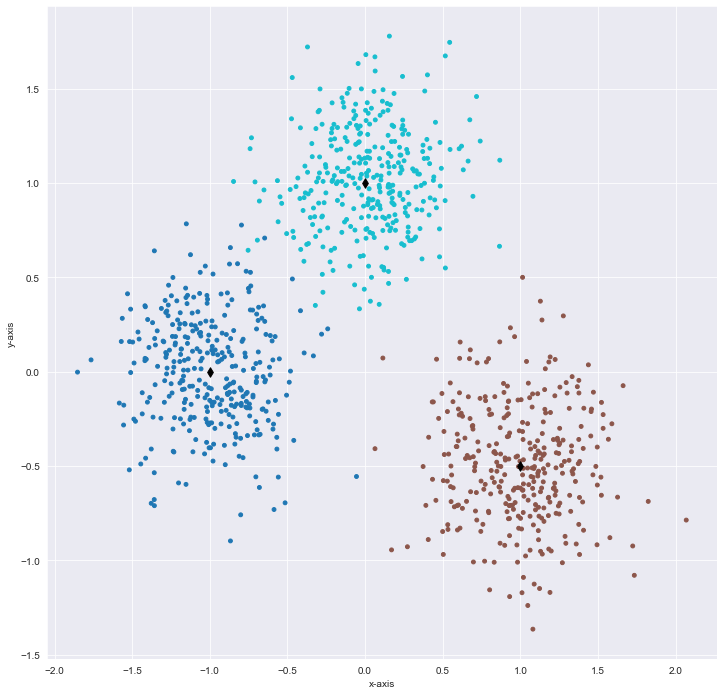

In [10]:
# define the figuer size cluster marker, and lable the cluster by cluster.
plt.figure(figsize=(12.0, 12.0))
cm = plt.cm.get_cmap('tab10')
plt.scatter(x, y, 15, nclust, marker="o", cmap=cm)
plt.scatter(xcent, ycent, 45, "k", marker="d")
plt.xlabel("x-axis")
plt.ylabel("y-axis")
plt.show()

[[ 2.37159972e-02  1.01786601e+00]
 [ 9.94014852e-01 -4.92313788e-01]
 [-1.00506416e+00  9.36303624e-04]]
0.6594039324788675


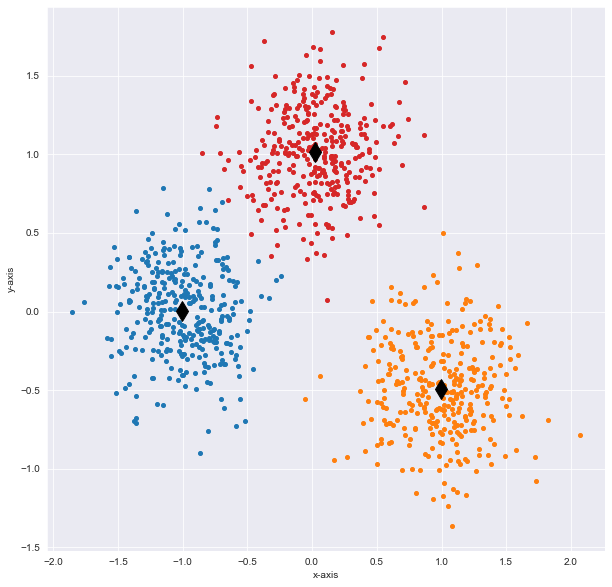

In [11]:
# from sklearn import cluster
import sklearn.cluster as cluster
import sklearn.metrics as skmet
ncluster = 3
kmeans = cluster.KMeans(n_clusters=ncluster) ## Fit the data, results are stored in the kmeans object
kmeans.fit(xy) # fit done on x,y pairs
labels = kmeans.labels_
cen = kmeans.cluster_centers_
print(cen)
print(skmet.silhouette_score(xy, labels))# calculate the silhoutte score
plt.figure(figsize=(10.0, 10.0))
col = ["tab:red", "tab:orange", "tab:blue", "tab:yellow", "tab:purple", "tab:blue", "tab:pink", "tab:gray", "tab:olive", "tab:cyan"] # plot using the labels to select colour
for l in range(ncluster): # loop over the different labels
    plt.plot(x[labels==l], y[labels==l], "o", markersize=4, color=col[l])
for ic in range(ncluster): # show cluster centres
    xc, yc = cen[ic,:]
    plt.plot(xc, yc, "dk", markersize=14)
plt.xlabel("x-axis")
plt.ylabel("y-axis")
plt.show()

In [12]:
print(kmeans.predict([[0.5, 0.5]]))

[0]


In [13]:
print(df.describe()) #description of daa mean, std,

       1990 [YR1990]  2000 [YR2000]  2013 [YR2013]  2014 [YR2014]  \
count   2.650000e+02   2.650000e+02   2.650000e+02   2.650000e+02   
mean    2.098902e+08   2.457198e+08   2.926255e+08   2.965306e+08   
std     6.672101e+08   7.789959e+08   9.182722e+08   9.297441e+08   
min     9.182000e+03   9.638000e+03   1.069400e+04   1.089900e+04   
25%     1.040616e+06   1.272935e+06   1.697753e+06   1.743309e+06   
50%     7.096194e+06   8.170172e+06   1.014958e+07   1.028212e+07   
75%     4.787807e+07   4.917650e+07   6.023395e+07   6.078914e+07   
max     5.293517e+09   6.144323e+09   7.229185e+09   7.317509e+09   

       2015 [YR2015]  2016 [YR2016]  2017 [YR2017]  2018 [YR2018]  \
count   2.650000e+02   2.650000e+02   2.650000e+02   2.650000e+02   
mean    3.004038e+08   3.042669e+08   3.081231e+08   3.118920e+08   
std     9.410682e+08   9.523041e+08   9.635106e+08   9.743511e+08   
min     1.087700e+04   1.085200e+04   1.082800e+04   1.086500e+04   
25%     1.788196e+06   1.777557e+

In [14]:
from sklearn.preprocessing import MinMaxScaler #impoert MinMaxScaler is a normalization scaler that scales and translates data
scaler = MinMaxScaler() # apply normalization to the data.

In [15]:
X= df.iloc[: , 4: :] # presenting the only interested data, other are subtracted
X

,1990 [YR1990],2000 [YR2000],2013 [YR2013],2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019],2020 [YR2020],2021 [YR2021]
0,5293517142,6144322697,7229184551,7317508753,7404910892,7491934113,7578157615,7661776338,7742681934,7820981524,7888408686
1,10694796,19542982,31541209,32716210,33753499,34636207,35643418,36686784,37769499,38972230,40099462
2,3286542,3089027,2895092,2889104,2880703,2876101,2873457,2866376,2854191,2837849,2811666
3,25518074,30774621,38000626,38760168,39543154,40339329,41136546,41927007,42705368,43451666,44177969
4,47818,58230,52995,52217,51368,50448,49463,48424,47321,46189,45035
...,...,...,...,...,...,...,...,...,...,...,...
260,1141434379,1406946728,1731137145,1753568847,1775178483,1796850154,1818868706,1840534093,1861598514,1882531620,1901911604
261,516629688,671212486,955096428,981506334,1008698525,1036155715,1063885000,1092403699,1121548775,1151301807,1181162739
262,516560181,671131355,955006479,981414975,1008605106,1036061038,1063789157,1092306937,1121451150,1151203345,1181063481
263,516629688,671212486,955096428,981506334,1008698525,1036155715,1063885000,1092403699,1121548775,1151301807,1181162739


In [16]:
df[X.columns] = scaler.fit_transform(df[X.columns]) #scales and normalizes the values of the selected columns to a range between 0 and 1, 

In [17]:
# choosing the interested data and printing that we use for correlation
df_pop = df[['1990 [YR1990]', '2000 [YR2000]', '2013 [YR2013]', '2015 [YR2015]', '2018 [YR2018]','2021 [YR2021]']]
print(df_pop.describe())

       1990 [YR1990]  2000 [YR2000]  2013 [YR2013]  2015 [YR2015]  \
count     265.000000     265.000000     265.000000     265.000000   
mean        0.039649       0.039990       0.040477       0.040567   
std         0.126043       0.126783       0.127023       0.127087   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000195       0.000206       0.000233       0.000240   
50%         0.001339       0.001328       0.001402       0.001397   
75%         0.009043       0.008002       0.008331       0.008200   
max         1.000000       1.000000       1.000000       1.000000   

       2018 [YR2018]  2021 [YR2021]  
count     265.000000     265.000000  
mean        0.040706       0.040865  
std         0.127171       0.127262  
min         0.000000       0.000000  
25%         0.000233       0.000225  
50%         0.001355       0.001330  
75%         0.007885       0.008060  
max         1.000000       1.000000  


In [18]:
# calculating the correlation matrix for dataframe using corr method.
import cluster_tools as ct
corr = df_pop.corr()
print(corr)

               1990 [YR1990]  2000 [YR2000]  2013 [YR2013]  2015 [YR2015]  \
1990 [YR1990]       1.000000       0.999401       0.996669       0.996100   
2000 [YR2000]       0.999401       1.000000       0.998842       0.998486   
2013 [YR2013]       0.996669       0.998842       1.000000       0.999975   
2015 [YR2015]       0.996100       0.998486       0.999975       1.000000   
2018 [YR2018]       0.995108       0.997825       0.999834       0.999938   
2021 [YR2021]       0.993808       0.996906       0.999518       0.999712   

               2018 [YR2018]  2021 [YR2021]  
1990 [YR1990]       0.995108       0.993808  
2000 [YR2000]       0.997825       0.996906  
2013 [YR2013]       0.999834       0.999518  
2015 [YR2015]       0.999938       0.999712  
2018 [YR2018]       1.000000       0.999917  
2021 [YR2021]       0.999917       1.000000  


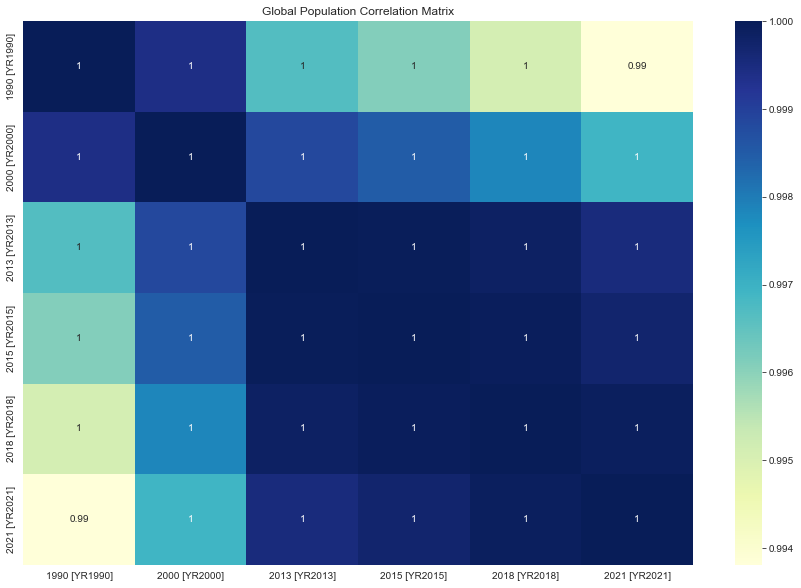

In [19]:
# visual representation of the strength and direction of the correlations between the variables in the DataFrame
plt.figure(figsize=(15, 10))
corr = corr.fillna(0)
sns.heatmap(corr, annot=True, cmap="YlGnBu") #generates a heatmap of the correlation matrix using seaborn library
plt.title("Global Population Correlation Matrix")
plt.show()

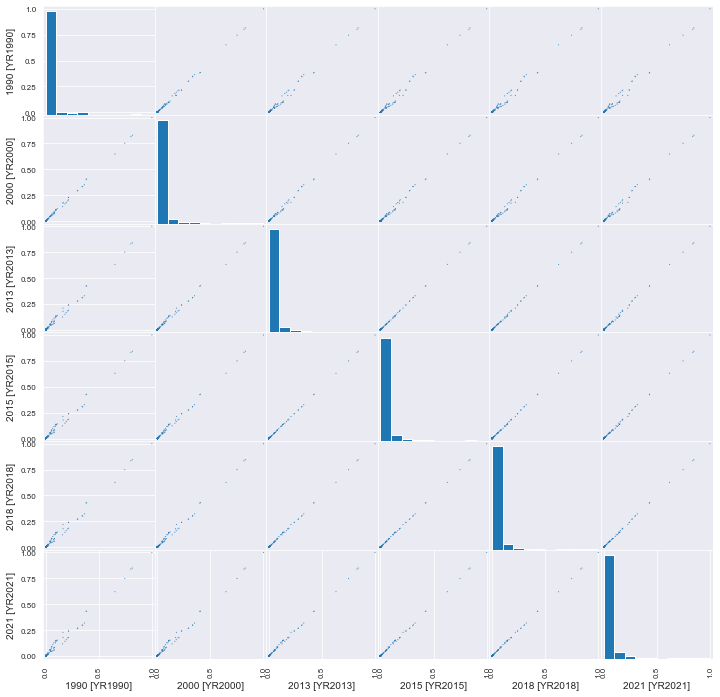

In [20]:
#creates a scatter matrix plot of the columns in the DataFrame of df_pop. Each variable is plotted against all other variables, resulting in a grid of scatter plots.
pd.plotting.scatter_matrix(df_pop, figsize=(12, 12), s=5, alpha=0.8)
plt.show()

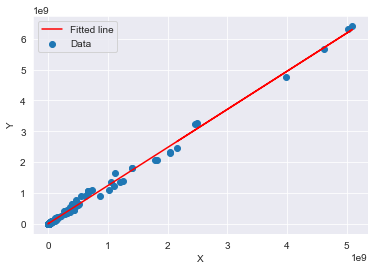

Fitted Parameters:
a = 1.2350212942147407
b = 4710243.509586884


In [21]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit #this function is used to fit a user-defined function to a given set of data points using non-linear least squares optimization.

def linear_function(x, a, b):
    """Linear function for fitting.
    
    Parameters:
    -----------
    x : numpy.ndarray
        The input x-values.
    a : float
        The slope of the line.
    b : float
        The y-intercept of the line.
        
    Returns:
    --------
    numpy.ndarray
        The predicted y-values for the given x-values.
    """
    return a * x + b

# Load data from POP CSV file
data = np.genfromtxt('pop1.csv', delimiter=',', skip_header=1, usecols=(1,6))

# Remove NaN and infinite values
# and creates a boolean mask that is True where both elements of the corresponding row
mask = np.logical_and(np.isfinite(data[:, 0]), np.isfinite(data[:, 1]))
data = data[mask]

x = data[:, 0]  # assign the First column of data as x-vector
y = data[:, 1]  # and Second column as y-vector
#curve fit function is fit a curve to the given data x and y. 
popt, pcov = curve_fit(linear_function, x, y)
# Extract fitted parameters
a_fit, b_fit = popt
# Create predicted y-values using fitted parameters
y_pred = linear_function(x, a_fit, b_fit)
# Plot the original data and the fitted line
plt.scatter(x, y, label='Data')
plt.plot(x, y_pred, 'r', label='Fitted line')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()
# Print the fitted parameters
print("Fitted Parameters:")
print("a =", a_fit)
print("b =", b_fit)

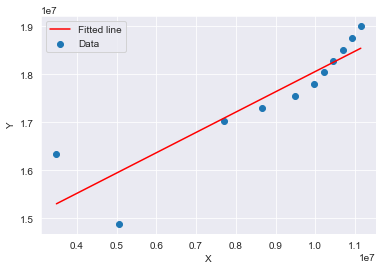

Fitted Parameters:
a = 0.42257005059993247
b = 13831797.044899462


In [22]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

def linear_function(x, a, b):
    """Linear function for fitting."""
    return a * x + b

# Load data from CSV file
data = np.loadtxt('pop1.csv', delimiter=',')
x = data[100]  # First row as x-vector
y = data[101]  # INPUT SERIAL NUMBER OF COUNTRY as y-vectors

# Fit linear regression using curve_fit
popt, pcov = curve_fit(linear_function, x, y)

# Extract fitted parameters
a_fit, b_fit = popt

# Create predicted y-values using fitted parameters
y_pred = linear_function(x, a_fit, b_fit)

# Plot the original data and the fitted line
plt.scatter(x, y, label='Data')
plt.plot(x, y_pred, 'r', label='Fitted line')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

# Print the fitted parameters
print("Fitted Parameters:")
print("a =", a_fit)
print("b =", b_fit)